In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
ko_df = pd.read_csv('ko_data.csv')
nko_df = pd.read_csv('nko_data.csv')

df = pd.concat([ko_df, nko_df], axis=0, ignore_index=True)
df.to_csv('ufc_df.csv', index=False, encoding='utf-8-sig')

df.head(10)

,fight,final_round,ko여부,winner_sig_str_succ,winner_sig_str_att,loser_sig_str_succ,loser_sig_str_att,winner_total_str_succ,winner_total_str_att,loser_total_str_succ,...,winner_sig_str_pct,loser_sig_str_pct,winner_td_pct,loser_td_pct,winner_sub_att,loser_sub_att,winner_rev,loser_rev,winner_ctrl_sec,loser_ctrl_sec
0,fight2,2,1,17.0,31.0,14.0,28.0,38.0,53.0,18.0,...,54.0,50.0,0.0,50.0,0.0,0.0,0.0,0.0,143.0,8.0
1,fight6,2,1,12.0,36.0,11.0,53.0,12.0,36.0,11.0,...,33.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,fight7,2,1,29.0,73.0,20.0,57.0,31.0,75.0,25.0,...,39.0,35.0,0.0,100.0,0.0,1.0,0.0,0.0,21.0,136.0
3,fight10,2,1,8.0,18.0,3.0,8.0,14.0,25.0,13.0,...,44.0,37.0,0.0,50.0,0.0,2.0,0.0,0.0,0.0,260.0
4,fight12,2,1,39.0,63.0,36.0,82.0,45.0,70.0,44.0,...,61.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,6.0
5,fight20,2,1,11.0,31.0,10.0,37.0,11.0,31.0,14.0,...,35.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
6,fight22,2,1,20.0,52.0,4.0,10.0,41.0,87.0,27.0,...,38.0,40.0,33.0,0.0,0.0,0.0,0.0,0.0,230.0,0.0
7,fight23,2,1,35.0,40.0,4.0,5.0,57.0,66.0,12.0,...,87.0,80.0,100.0,0.0,0.0,0.0,0.0,0.0,277.0,0.0
8,fight26,2,1,27.0,54.0,35.0,53.0,27.0,54.0,35.0,...,50.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,fight35,2,1,9.0,25.0,8.0,16.0,9.0,25.0,32.0,...,36.0,50.0,0.0,33.0,0.0,0.0,0.0,0.0,2.0,172.0


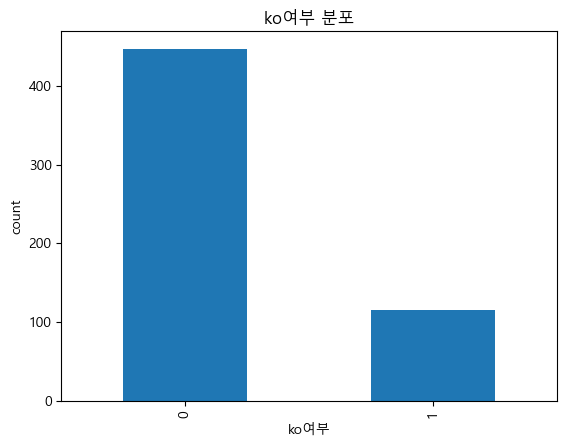

ko여부
0    447
1    116
Name: count, dtype: int64

In [3]:
import platform
import matplotlib.pyplot as plt

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')
    
plt.rcParams['axes.unicode_minus'] = False

#value_counts 시각화
df['ko여부'].value_counts().plot(kind='bar')
plt.title('ko여부 분포')
plt.xlabel('ko여부')
plt.ylabel('count')
plt.show()

df['ko여부'].value_counts()

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['ko여부', 'fight']) #경기 label 필요없을 것 같아 제거
y = df['ko여부']

X_train_valid, X_test, y_train_valid, y_train = train_test_split(
    X, y,
    test_size=0.2,
    random_state=1,
    stratify=y
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_valid, y_train_valid,
    test_size=0.25,
    random_state=1,
    stratify=y_train_valid
)

#train:valid:test = 60:20:20
print('Train: ', X_train.shape)
print('Valid: ', X_valid.shape)
print('Test: ', X_test.shape)

Train:  (337, 49)
Valid:  (113, 49)
Test:  (113, 49)


스케일링 진행 x

In [5]:
print(X_train.shape)
print(y_train.shape)

(337, 49)
(337,)


In [6]:
print(X_train.dtypes)
print(X_train.isnull().sum().sum())

final_round                 int64
winner_sig_str_succ       float64
winner_sig_str_att        float64
loser_sig_str_succ        float64
loser_sig_str_att         float64
winner_total_str_succ     float64
winner_total_str_att      float64
loser_total_str_succ      float64
loser_total_str_att       float64
winner_td_attempt_succ    float64
winner_td_attempt_att     float64
loser_td_attempt_succ     float64
loser_td_attempt_att      float64
winner_head_succ          float64
winner_head_att           float64
loser_head_succ           float64
loser_head_att            float64
winner_body_succ          float64
winner_body_att           float64
loser_body_succ           float64
loser_body_att            float64
winner_leg_succ           float64
winner_leg_att            float64
loser_leg_succ            float64
loser_leg_att             float64
winner_distance_succ      float64
winner_distance_att       float64
loser_distance_succ       float64
loser_distance_att        float64
winner_clinch_

In [ ]:
#수정 전 코드
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE

rf = RandomForestClassifier(
    n_estimators=300,
    class_weight={0:1, 1:10},
    max_depth=10,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('SMOTE 전: ', X_train.shape, y_train.value_counts().to_dict())
print('SMOTE 후: ', X_train_res.shape, y_train_res.value_counts().to_dict())

rf.fit(X_train_res, y_train_res)

threshold = 0.40

y_train_proba = rf.predict_proba(X_train)[:,1]
y_valid_proba = rf.predict_proba(X_valid)[:,1]

y_train_pred = (y_train_proba >= threshold).astype(int)
y_valid_pred = (y_valid_proba >= threshold).astype(int)

#비교
print("train report")
print(classification_report(y_train, y_train_pred, digits=3))

print("valid report")
print(classification_report(y_valid, y_valid_pred, digits=3))

print("train")
print("accuracy: ", accuracy_score(y_train, y_train_pred))
print("f1-score: ", f1_score(y_train, y_train_pred))

print("valid")
print("accuracy: ", accuracy_score(y_valid, y_valid_pred))
print("f1-score: ", f1_score(y_valid, y_valid_pred))

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

rf = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    max_depth=6,
    min_samples_leaf=3,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_train_proba = rf.predict_proba(X_train)[:, 1]
y_valid_proba = rf.predict_proba(X_valid)[:, 1]

#validation F1이 최대가 되는 threshold
thresholds = np.arange(0.1, 0.9, 0.01)

best_thr = None
best_f1 = -1.0

for thr in thresholds:
    y_valid_pred_tmp = (y_valid_proba >= thr).astype(int)
    f1 = f1_score(y_valid, y_valid_pred_tmp)

    if f1 > best_f1:
        best_f1 = f1
        best_thr = thr

print(f"최적 threshold: {best_thr:.2f}")
print(f"최적 threshold에서의 valid F1: {best_f1:.3f}")

# 4. 최적 threshold로 최종 train/valid
y_train_pred = (y_train_proba >= best_thr).astype(int)
y_valid_pred = (y_valid_proba >= best_thr).astype(int)

print("train report")
print(classification_report(y_train, y_train_pred, digits=3))

print("Train accuracy:", accuracy_score(y_train, y_train_pred))
print("Train F1-score:", f1_score(y_train, y_train_pred))

print("valid report")
print(classification_report(y_valid, y_valid_pred, digits=3))

print("Valid accuracy:", accuracy_score(y_valid, y_valid_pred))
print("Valid F1-score:", f1_score(y_valid, y_valid_pred))


최적 threshold: 0.41
최적 threshold에서의 valid F1: 0.565
train report
              precision    recall  f1-score   support

           0      0.996     0.951     0.973       267
           1      0.841     0.986     0.908        70

    accuracy                          0.958       337
   macro avg      0.919     0.969     0.941       337
weighted avg      0.964     0.958     0.960       337

Train accuracy: 0.9584569732937686
Train F1-score: 0.9078947368421053
valid report
              precision    recall  f1-score   support

           0      0.889     0.889     0.889        90
           1      0.565     0.565     0.565        23

    accuracy                          0.823       113
   macro avg      0.727     0.727     0.727       113
weighted avg      0.823     0.823     0.823       113

Valid accuracy: 0.8230088495575221
Valid F1-score: 0.5652173913043478
